In [1]:
import numpy as np
import math as mt
import matplotlib.pylab as plt

In [2]:
def ReLU(z):
        return z * (z > 0)

def tanh(z):
    return np.tanh(z)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)


In [3]:
def plot(lst_mat,row,col):
    f, ax = plt.subplots(row, col, figsize=(5,5))
    i,j=0,0
    for k in lst_mat:
        ax[i, j].imshow(k)
        j+=1
        if(j==col):
            j=0
            i+=1

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

(32, 32)


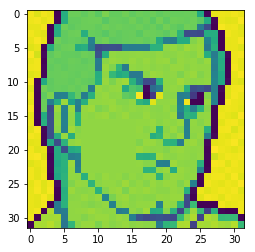

In [19]:
img = plt.imread('./../input_data/man.jpeg')
img= rgb2gray(img)
plt.imshow(img)
# img = img.reshape(-1,img.shape[0],img.shape[1])
# img = img.reshape(img.shape[1],-1,img.shape[0])
print (img.shape)




In [20]:
class ConnNeuralNetwork:
    def __init__(self, hyperparameters, image, channel_axis = "last"):
        if channel_axis == "last":
            # interchange last row
            self.image = image.reshape(-1,image.shape[0],image.shape[1])
        else:
            self.image = image
        print("Image shape: ",self.image.shape)
        self.hp = hyperparameters
        
    def conPhase(self, activation):
        con_output = self.image
        for i in range(0, len(self.hp), 2):
            con_output = self.convolution(self.hp[i], con_output, activation)
#             print("con_output.shape: ",con_output.shape)
#             print("con_output: ",con_output)
            m,n = self.get_mn(con_output.shape[0])
            plot(con_output, m, n)
            maxpool_output = self.maxpool(self.hp[i+1], con_output)
#             print("maxpool_output.shape: ",maxpool_output.shape)
#             print("maxpool_output: ",maxpool_output)
            m,n = self.get_mn(maxpool_output.shape[0])
            plot(maxpool_output, m, n)
            con_output = maxpool_output
        return con_output
            
    def initisalize_hyperpara(self, hpF, img, filter_bais = True):
        D1 = img.shape[0]
        W1 = img.shape[1]
        H1 = img.shape[2]
        print("D1,W1,H1: ",D1,W1,H1)
        
        n_F = hpF[0]
        F = hpF[1]
        S = hpF[3]
        D2 = n_F  
        W2 = int((W1 - F)/S) + 1
        H2 = int((H1 - F)/S) + 1
        print("D2,W2,H2: ",D2,W2,H2)
        feature_map_ = np.zeros((D2, W2, H2),dtype=float)
        if filter_bais:    
            filter_ = np.random.normal(0, np.sqrt(2.0/F), (D2, F, F))
            bias_ = np.random.normal(0, np.sqrt(2.0/D2), D2)
            return feature_map_, filter_, bias_
        else:
            return feature_map_
        
        
    def convolution(self, hpF, img, activation):
        print("\nConvolution..........")
        feature_map_, filter_, bias_ = self.initisalize_hyperpara(hpF, img, filter_bais = True)
        W1 = img.shape[1]
        H1 = img.shape[2]
        F = hpF[1]
        S = hpF[3]
        for i in range(filter_.shape[0]):
            curr_y = out_y = 0
            # move filter vertically across the image
            while curr_y + F <= H1:
                curr_x = out_x = 0
                # move filter horizontally across the image 
                while curr_x + F <= W1:
                    # perform the convolution operation and add the bias
                    feature_map_[i,out_y, out_x] = np.sum(filter_[i] * img[:,curr_y:curr_y+F, curr_x:curr_x+F]) + bias_[i]
                    curr_x += S
                    out_x += 1
                curr_y += S
                out_y += 1
        if activation == "tanh":
            return tanh(feature_map_)
        if activation == "ReLU":
            return ReLU(feature_map_)
        if activation == "sigmoid":
            return sigmoid(feature_map_)
        print("\n")
            
        return feature_map_
   
    
    def maxpool(self, hpF, img):
        print("\nMaxPool..........")
        downsampled_feature_map_ = self.initisalize_hyperpara(hpF, img, filter_bais = False)
        W1 = img.shape[1]
        H1 = img.shape[2]
        F = hpF[1]
        S = hpF[3]
        D2 = downsampled_feature_map_.shape[0]
        for i in range(D2):
            curr_y = out_y = 0
            # move filter vertically across the image
            while curr_y + F <= H1:
                curr_x = out_x = 0
                # move filter horizontally across the image 
                while curr_x + F <= W1:
                    # perform the convolution operation and add the bias
                    downsampled_feature_map_[i,out_y, out_x] = np.max(img[i,curr_y:curr_y+F, curr_x:curr_x+F])
                    curr_x += S
                    out_x += 1
                curr_y += S
                out_y += 1
        print("\n")        
        return downsampled_feature_map_
    
    
    def FullyConnectedLayers(self, Layers, img, activation):
        print("\nFullyConnectedLayer")
        flattened_img = img.reshape(np.prod(conv_res.shape),1)
        print(flattened_img.shape)
        for i in range(0,len(Layers)):
            WT = np.random.randn(Layers[i],flattened_img.shape[0])
            print("WT shape: \n",WT.shape)
            if i != len(Layers) - 1:
                flattened_img = np.dot(WT,flattened_img)
                if activation == "tanh":
                    flattened_img = tanh(flattened_img)
                if activation == "ReLU":
                    flattened_img = ReLU(flattened_img)
                if activation == "sigmoid":
                    flattened_img = sigmoid(flattened_img)
                print(flattened_img.shape)
            else:
                flattened_img = np.sum((flattened_img - WT.T)**2, axis=0)
                print(flattened_img.shape)
                print("\n")
                return softmax(flattened_img).reshape(-1,1)
        
    
    def get_mn(self,y):
        sq = mt.floor(np.sqrt(y))
        for i in range(sq, 1, -1):
            if y % i == 0:
                return i , int(y/i)
            

In [21]:
# con_filter# = [ depth/count, width , height, strid ]
# maxpool_filter1 = [ depth/count, width , height, strid ]
con_filter1 = [6, 5, 5 , 1]
maxpool_filter1 = [6, 2 , 2 ,2]
con_filter2 = [16, 5, 5, 1]
maxpool_filter2 = [16, 2 , 2 ,2]
hyperparameters = [con_filter1, maxpool_filter1, con_filter2, maxpool_filter2]

In [22]:
CNN = ConnNeuralNetwork(hyperparameters, img)

Image shape:  (1, 32, 32)



Convolution..........
D1,W1,H1:  1 32 32
D2,W2,H2:  6 28 28

MaxPool..........
D1,W1,H1:  6 28 28
D2,W2,H2:  6 14 14



Convolution..........
D1,W1,H1:  6 14 14
D2,W2,H2:  16 10 10

MaxPool..........
D1,W1,H1:  16 10 10
D2,W2,H2:  16 5 5




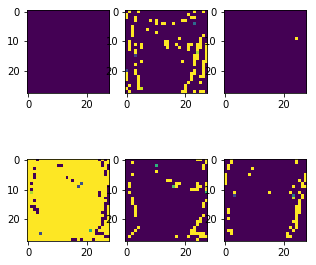

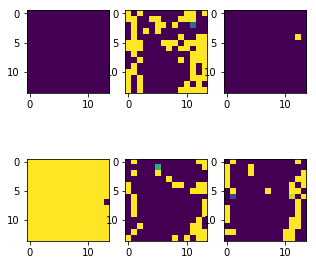

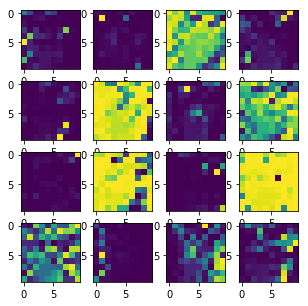

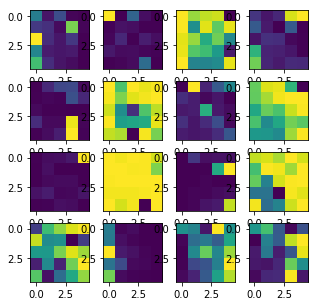

In [23]:
conv_res = CNN.conPhase(activation = "sigmoid")

In [24]:
Layers = [120, 84, 10]

In [25]:
RESULT = CNN.FullyConnectedLayers(Layers, conv_res,activation = "sigmoid")
RESULT


FullyConnectedLayer
(400, 1)
WT shape: 
 (120, 400)
(120, 1)
WT shape: 
 (84, 120)
(84, 1)
WT shape: 
 (10, 84)
(10,)




array([[3.65167174e-21],
       [9.97438017e-17],
       [1.76589635e-23],
       [2.21132014e-21],
       [7.88125087e-03],
       [9.92118548e-01],
       [3.44699471e-12],
       [2.68737412e-10],
       [2.00785777e-07],
       [8.09772404e-23]])

In [26]:
CNNtanh = ConnNeuralNetwork(hyperparameters, img)

Image shape:  (1, 32, 32)



Convolution..........
D1,W1,H1:  1 32 32
D2,W2,H2:  6 28 28

MaxPool..........
D1,W1,H1:  6 28 28
D2,W2,H2:  6 14 14



Convolution..........
D1,W1,H1:  6 14 14
D2,W2,H2:  16 10 10

MaxPool..........
D1,W1,H1:  16 10 10
D2,W2,H2:  16 5 5




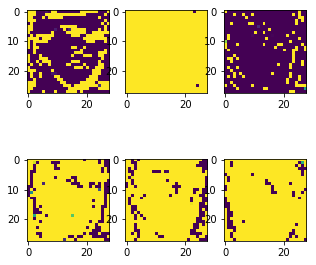

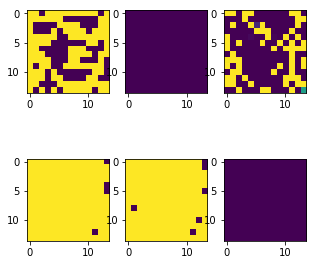

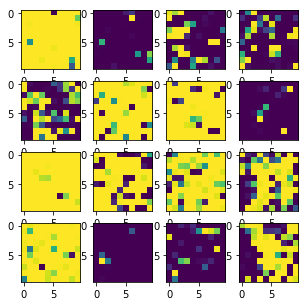

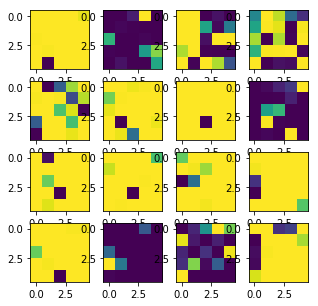

In [27]:
conv_res = CNNtanh.conPhase(activation = "tanh")

In [28]:
RESULT = CNNtanh.FullyConnectedLayers(Layers, conv_res,activation = "tanh")
RESULT


FullyConnectedLayer
(400, 1)
WT shape: 
 (120, 400)
(120, 1)
WT shape: 
 (84, 120)
(84, 1)
WT shape: 
 (10, 84)
(10,)




array([[4.91727103e-07],
       [5.02900842e-09],
       [4.62063980e-08],
       [2.24502364e-22],
       [5.38403106e-07],
       [9.46374474e-14],
       [6.90019366e-05],
       [1.11259301e-23],
       [2.74842471e-13],
       [9.99929917e-01]])

In [29]:
CNNReLU = ConnNeuralNetwork(hyperparameters, img)

Image shape:  (1, 32, 32)



Convolution..........
D1,W1,H1:  1 32 32
D2,W2,H2:  6 28 28

MaxPool..........
D1,W1,H1:  6 28 28
D2,W2,H2:  6 14 14



Convolution..........
D1,W1,H1:  6 14 14
D2,W2,H2:  16 10 10

MaxPool..........
D1,W1,H1:  16 10 10
D2,W2,H2:  16 5 5




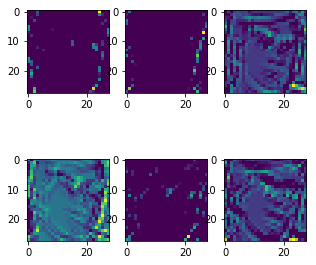

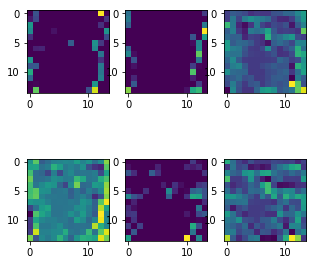

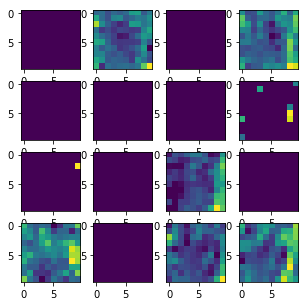

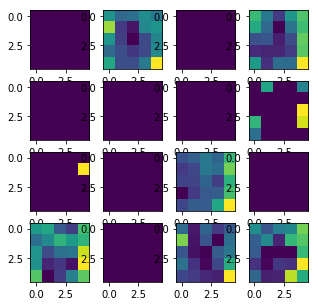

In [30]:
conv_res = CNNReLU.conPhase(activation = "ReLU")

In [31]:
RESULT = CNNReLU.FullyConnectedLayers(Layers, conv_res,activation = "ReLU")
RESULT


FullyConnectedLayer
(400, 1)
WT shape: 
 (120, 400)
(120, 1)
WT shape: 
 (84, 120)
(84, 1)
WT shape: 
 (10, 84)
(10,)




array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])